## Problem Statement:
The Placement of students is one of the most important objective of an educational
institution. Reputation and yearly admissions of an institution invariably depend on the
placements it provides it students with. That is why all the institutions, arduously, strive
to strengthen their placement department so as to improve their institution on a whole.
Any assistance in this particular area will have a positive impact on an institution’s ability
to place its students. This will always be helpful to both the students, as well as the
institution.

The main goal is to predict whether the student will be recruited in campus placements
or not based on the available factors in the dataset.

Approach: The classical machine learning tasks like Data Exploration, Data Cleaning,
Feature Engineering, Model Building and Model Testing. Try out different machine
learning algorithms that’s best fit for the above case.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st
import warnings
warnings.filterwarnings("ignore")
sns.set(rc={"figure.figsize":(15,6)})
pd.pandas.set_option("display.max_columns",None)

## EDA & Feature Engeneering

In [2]:
data = pd.read_csv("Campus Recruitment Prediction.csv")

In [3]:
data.drop("sl_no",axis=1,inplace=True)

In [4]:
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [5]:
data.tail()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
210,0,80.6,Others,82.0,Others,Commerce,77.6,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,0,58.0,Others,60.0,Others,Science,72.0,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,0,67.0,Others,67.0,Others,Commerce,73.0,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,1,74.0,Others,66.0,Others,Commerce,58.0,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0
214,0,62.0,Central,58.0,Others,Science,53.0,Comm&Mgmt,No,89.0,Mkt&HR,60.22,Not Placed,NaN


In [6]:
data.shape

(215, 14)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    int64  
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(7)
memory usage: 23.6+ KB


In [8]:
# Check null values in data
data.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [9]:
# check Duplicet values in data
data.duplicated().sum()

0

In [10]:
# Handel the null value in salary we can use median to fill nan
data["salary"] = data["salary"].fillna(np.nanmedian(data["salary"]))

In [11]:
# Saprate catigorical and numerical data 
catigorical_features = data.select_dtypes(include="object").columns
numerical_features = data.select_dtypes(exclude="object").columns
print(catigorical_features)
print(numerical_features)

Index(['ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation',
       'status'],
      dtype='object')
Index(['gender', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary'], dtype='object')


In [12]:
# Check unique value in catigorical data
for i in catigorical_features:
    print(i,data[i].unique())
    print("="*60)

ssc_b ['Others' 'Central']
hsc_b ['Others' 'Central']
hsc_s ['Commerce' 'Science' 'Arts']
degree_t ['Sci&Tech' 'Comm&Mgmt' 'Others']
workex ['No' 'Yes']
specialisation ['Mkt&HR' 'Mkt&Fin']
status ['Placed' 'Not Placed']


In [13]:
# Check value count of catigorical data
for i in catigorical_features:
    print(i,data[i].value_counts())
    print("="*60)

ssc_b Central    116
Others      99
Name: ssc_b, dtype: int64
hsc_b Others     131
Central     84
Name: hsc_b, dtype: int64
hsc_s Commerce    113
Science      91
Arts         11
Name: hsc_s, dtype: int64
degree_t Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64
workex No     141
Yes     74
Name: workex, dtype: int64
specialisation Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64
status Placed        148
Not Placed     67
Name: status, dtype: int64


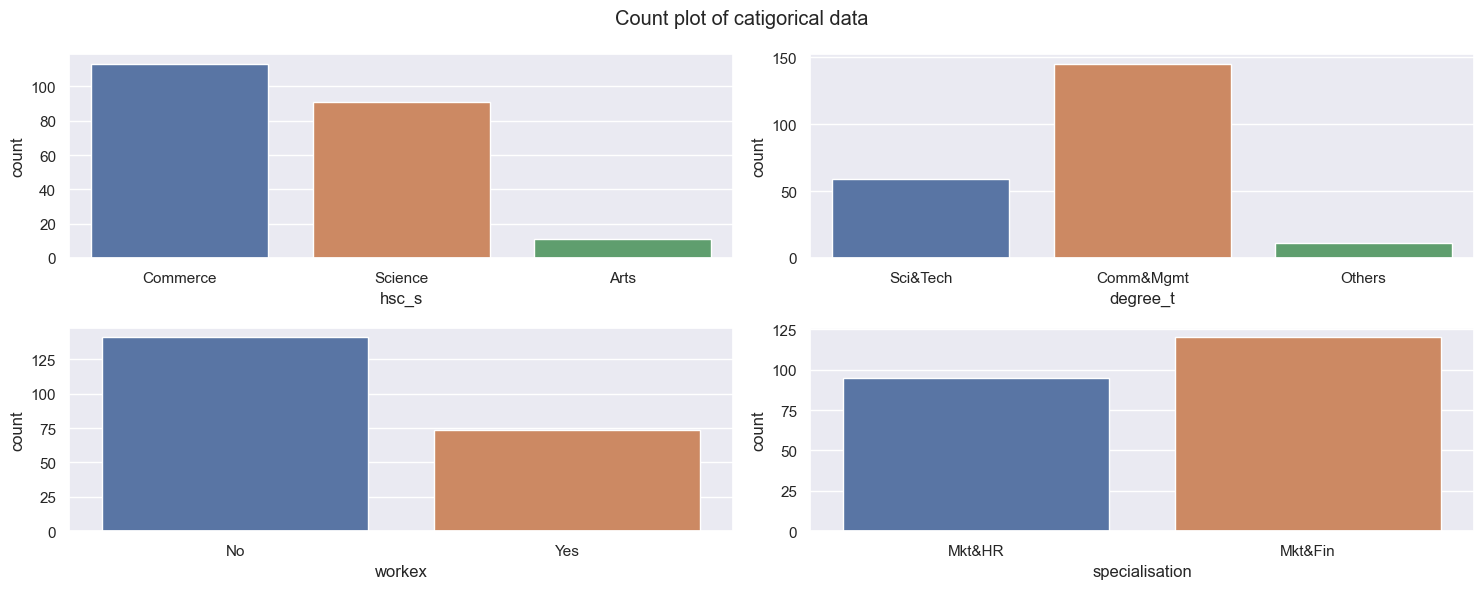

In [14]:
cato = ['hsc_s', 'degree_t', 'workex', 'specialisation']
try:
    plt.suptitle("Count plot of catigorical data")
    for i in range(0,len(cato)):
        plt.subplot(2,2,i+1)
        sns.countplot(x=data[cato[i]])
        plt.tight_layout()
except Exception as e:
    print(e)

<AxesSubplot:xlabel='gender'>

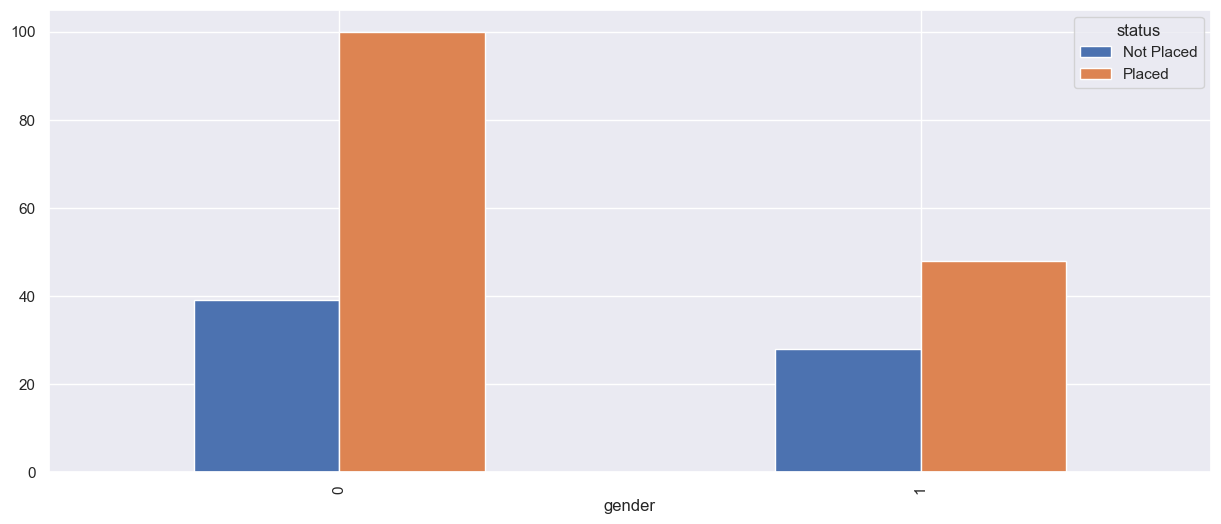

In [15]:
gender = pd.crosstab(data["gender"],data["status"])
gender.plot(kind="bar")

<AxesSubplot:xlabel='hsc_s'>

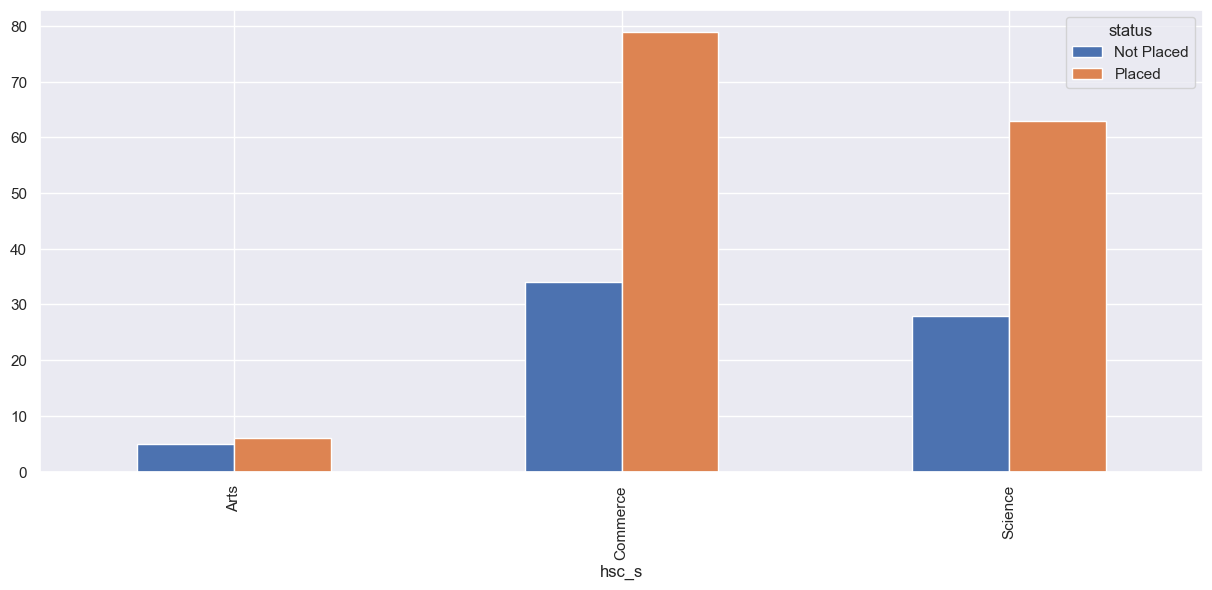

In [16]:
secondry_highschool = pd.crosstab(data["hsc_s"],data["status"])
secondry_highschool.plot(kind="bar")

<AxesSubplot:xlabel='degree_t'>

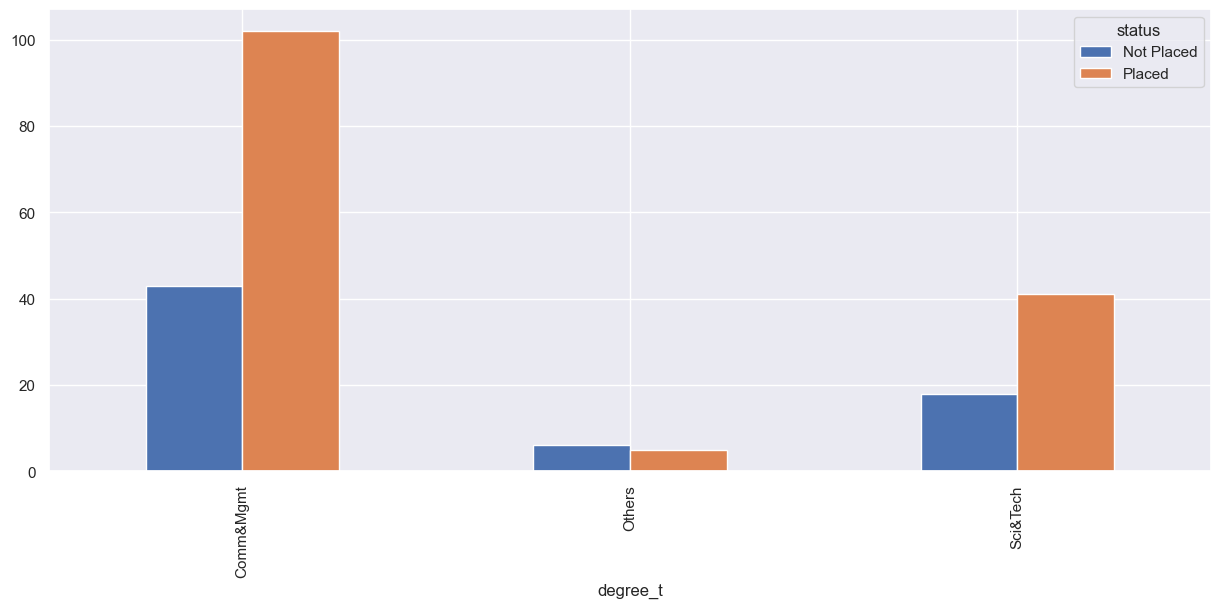

In [17]:
degree = pd.crosstab(data["degree_t"],data["status"])
degree.plot(kind="bar")

<AxesSubplot:xlabel='workex'>

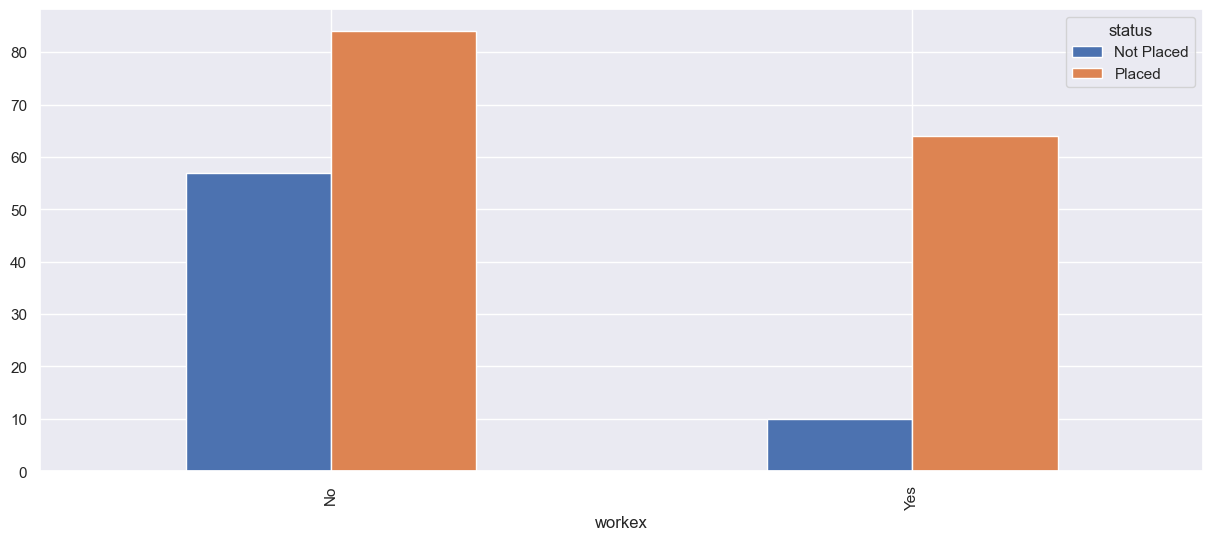

In [18]:
work_experience = pd.crosstab(data["workex"],data["status"])
work_experience.plot(kind="bar")

<AxesSubplot:xlabel='specialisation'>

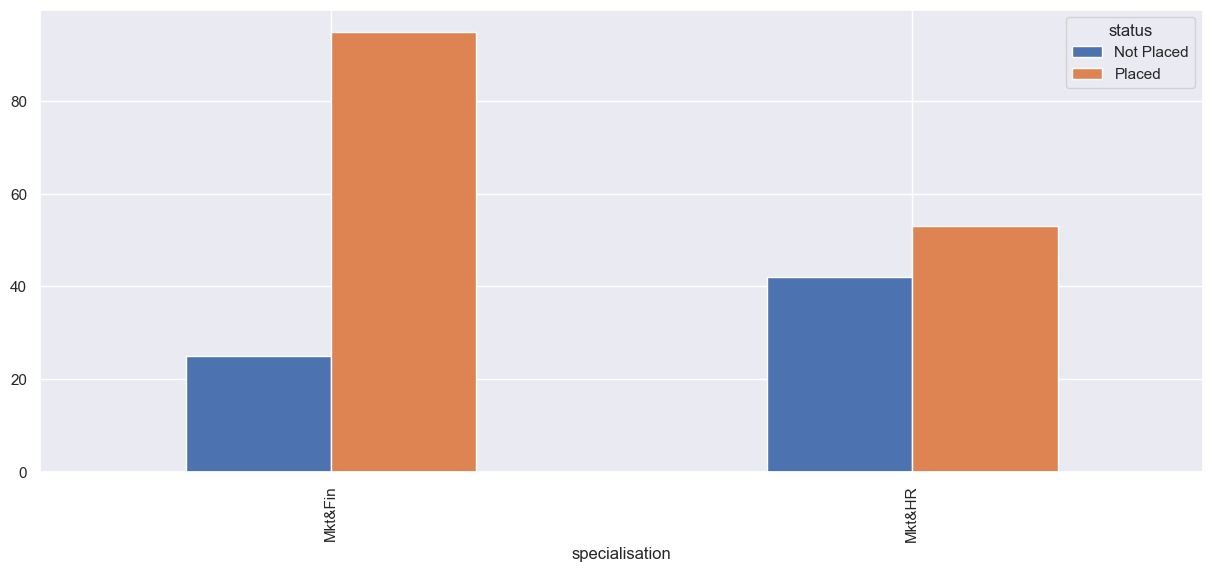

In [19]:
specialisation = pd.crosstab(data["specialisation"],data["status"])
specialisation.plot(kind="bar")

<AxesSubplot:ylabel='status'>

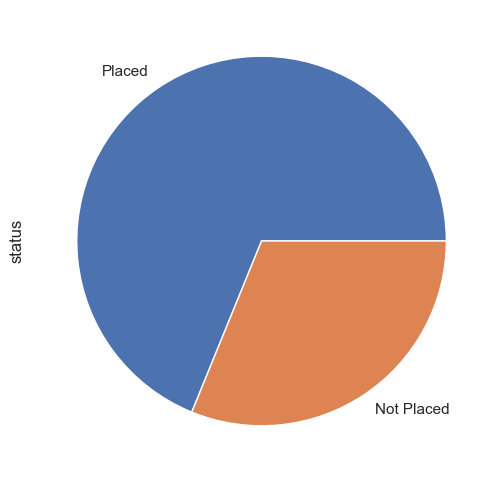

In [20]:
data["status"].value_counts().plot.pie()

In [21]:
# Drop Usless Columns from data
data.drop(['salary', 'gender', 'ssc_b', 'hsc_b'],axis=1,inplace=True)

In [22]:
catigorical_features = data.select_dtypes(include="object").columns
numerical_features = data.select_dtypes(exclude="object").columns
print(catigorical_features)
print(numerical_features)

Index(['hsc_s', 'degree_t', 'workex', 'specialisation', 'status'], dtype='object')
Index(['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p'], dtype='object')


In [23]:
# now we have to do labelencoding on catiforical data
from sklearn.preprocessing import LabelEncoder

# create a LabelEncoder object
le = LabelEncoder()

# define the categorical features
categorical_features = ['hsc_s', 'degree_t', 'workex', 'specialisation', 'status']

# loop through the categorical features and encode them
for i in categorical_features:
    le.fit(data[i])
    data[i] = le.transform(data[i])

<AxesSubplot:>

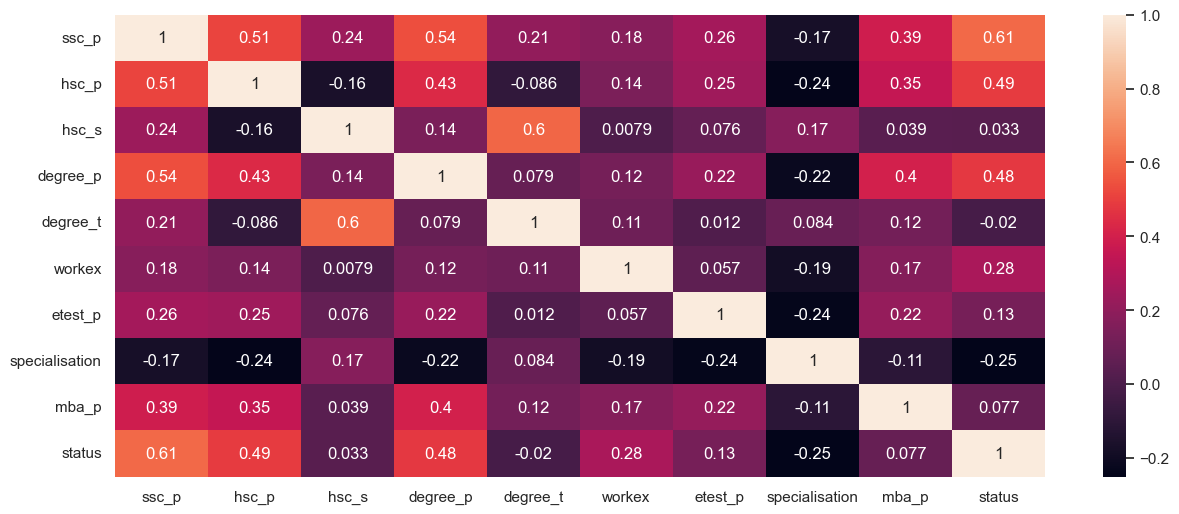

In [24]:
# Correlation With arget colums
sns.heatmap(data.corr(),annot=True)

## Model Traning

In [25]:
data.head()

,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,67.00,91.00,1,58.00,2,0,55.0,1,58.80,1
1,79.33,78.33,2,77.48,2,1,86.5,0,66.28,1
2,65.00,68.00,0,64.00,0,0,75.0,0,57.80,1
3,56.00,52.00,2,52.00,2,0,66.0,1,59.43,0
4,85.80,73.60,1,73.30,0,0,96.8,0,55.50,1


In [26]:
# Saprate Dependent and indipendent Features
x = data.drop("status",axis=1)
y = data["status"]

In [27]:
catigorical_features = x.select_dtypes(include="object").columns
numerical_features = x.select_dtypes(exclude="object").columns
print(catigorical_features)
print(numerical_features)

Index([], dtype='object')
Index(['ssc_p', 'hsc_p', 'hsc_s', 'degree_p', 'degree_t', 'workex', 'etest_p',
       'specialisation', 'mba_p'],
      dtype='object')


In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
##Pipline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [31]:
## num_pipline
num_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler())
    ]
)

# Create preprocessor object
preprocessor = ColumnTransformer([
    ("num_pipline",num_pipline,numerical_features)
])

In [32]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [33]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(172, 9)
(172,)
(43, 9)
(43,)


In [34]:
# trainsorm data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [35]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,accuracy_score,classification_report,ConfusionMatrixDisplay

In [36]:
def performance_metrices(test,predict):
    confusionmetrix = print(f"CONFUSION_METRIX: {confusion_matrix(test,predict)}")
    pre = print(f"PRECISION_SCORE: {precision_score(test,predict)}")
    recall = print(f"RECALL_SCORE: {recall_score(test,predict)}")
    f1score = print(f"F1_SCORE: {f1_score(test,predict)}")
    accuracyscore = print(f"ACCURACY_SCORE: {accuracy_score(test,predict)}")
    return confusionmetrix,pre,recall,f1score,accuracyscore

In [37]:
weights = {0:2,1:1}

In [38]:
# logastic regression
logastic = LogisticRegression(class_weight=weights)

In [39]:
logastic.fit(X_train,y_train)

LogisticRegression(class_weight={0: 2, 1: 1})

In [40]:
logastic.score(X_train,y_train)

0.9011627906976745

In [41]:
y_predict = logastic.predict(X_test)

In [42]:
performance_metrices(y_test,y_predict)

CONFUSION_METRIX: [[10  2]
 [ 3 28]]
PRECISION_SCORE: 0.9333333333333333
RECALL_SCORE: 0.9032258064516129
F1_SCORE: 0.9180327868852459
ACCURACY_SCORE: 0.8837209302325582


(None, None, None, None, None)

In [43]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80        12
           1       0.93      0.90      0.92        31

    accuracy                           0.88        43
   macro avg       0.85      0.87      0.86        43
weighted avg       0.89      0.88      0.89        43



In [44]:
## Decision Tree
tree = DecisionTreeClassifier(class_weight="balanced")
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced')

In [45]:
tree.score(X_train,y_train)

1.0

In [46]:
y_predict = tree.predict(X_test)

In [47]:
performance_metrices(y_test,y_predict)

CONFUSION_METRIX: [[ 7  5]
 [ 3 28]]
PRECISION_SCORE: 0.8484848484848485
RECALL_SCORE: 0.9032258064516129
F1_SCORE: 0.875
ACCURACY_SCORE: 0.813953488372093


(None, None, None, None, None)

In [48]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.70      0.58      0.64        12
           1       0.85      0.90      0.88        31

    accuracy                           0.81        43
   macro avg       0.77      0.74      0.76        43
weighted avg       0.81      0.81      0.81        43



In [49]:
## Support Vector Clessifier
svm  = LinearSVC(class_weight="balanced")
svm.fit(X_train,y_train)

LinearSVC(class_weight='balanced')

In [50]:
svm.score(X_train,y_train)

0.9069767441860465

In [51]:
y_predict = svm.predict(X_test)

In [52]:
performance_metrices(y_test,y_predict)

CONFUSION_METRIX: [[10  2]
 [ 3 28]]
PRECISION_SCORE: 0.9333333333333333
RECALL_SCORE: 0.9032258064516129
F1_SCORE: 0.9180327868852459
ACCURACY_SCORE: 0.8837209302325582


(None, None, None, None, None)

In [53]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80        12
           1       0.93      0.90      0.92        31

    accuracy                           0.88        43
   macro avg       0.85      0.87      0.86        43
weighted avg       0.89      0.88      0.89        43



In [54]:
## Random Forest
forest = RandomForestClassifier(class_weight="balanced")
forest.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced')

In [55]:
forest.score(X_train,y_train)

1.0

In [56]:
y_predict = forest.predict(X_test)

In [57]:
performance_metrices(y_test,y_predict)

CONFUSION_METRIX: [[ 6  6]
 [ 2 29]]
PRECISION_SCORE: 0.8285714285714286
RECALL_SCORE: 0.9354838709677419
F1_SCORE: 0.8787878787878788
ACCURACY_SCORE: 0.813953488372093


(None, None, None, None, None)

In [58]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.75      0.50      0.60        12
           1       0.83      0.94      0.88        31

    accuracy                           0.81        43
   macro avg       0.79      0.72      0.74        43
weighted avg       0.81      0.81      0.80        43



## Hypermater Tuening

In [59]:
# Logestic Regression
logastic1 = LogisticRegression(random_state=42)
params = {
    "penalty":["l1", "l2", "elasticnet", None],
    "class_weight":["balanced"],
    'C': [0.001, 0.01, 0.1, 1, 10,10.1],
    "solver":["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]
}

In [60]:
grid_search = GridSearchCV(estimator=logastic1,param_grid=params,cv=3)

In [61]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 10.1],
                         'class_weight': ['balanced'],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [62]:
grid_search.best_params_

{'C': 1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'lbfgs'}

In [63]:
grid_search.score(X_train,y_train)

0.9011627906976745

In [64]:
y_predict = grid_search.predict(X_test)

In [65]:
performance_metrices(y_test,y_predict)

CONFUSION_METRIX: [[10  2]
 [ 3 28]]
PRECISION_SCORE: 0.9333333333333333
RECALL_SCORE: 0.9032258064516129
F1_SCORE: 0.9180327868852459
ACCURACY_SCORE: 0.8837209302325582


(None, None, None, None, None)

In [66]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80        12
           1       0.93      0.90      0.92        31

    accuracy                           0.88        43
   macro avg       0.85      0.87      0.86        43
weighted avg       0.89      0.88      0.89        43



In [67]:
## Support vector clessfier
svm1 = LinearSVC(random_state=42)
params ={
    'C': [0.1, 1, 10],
    "penalty":["l1", "l2",],
    "loss":["hinge", "squared_hinge"],
    "class_weight":["balanced"],
}

In [68]:
grid_search = GridSearchCV(estimator=svm1,param_grid=params,cv=3)

In [69]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=LinearSVC(random_state=42),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'loss': ['hinge', 'squared_hinge'],
                         'penalty': ['l1', 'l2']})

In [70]:
grid_search.best_params_

{'C': 0.1,
 'class_weight': 'balanced',
 'loss': 'squared_hinge',
 'penalty': 'l2'}

In [71]:
grid_search.score(X_train,y_train)

0.9069767441860465

In [72]:
y_predict = grid_search.predict(X_test)

In [73]:
performance_metrices(y_test,y_predict)

CONFUSION_METRIX: [[10  2]
 [ 3 28]]
PRECISION_SCORE: 0.9333333333333333
RECALL_SCORE: 0.9032258064516129
F1_SCORE: 0.9180327868852459
ACCURACY_SCORE: 0.8837209302325582


(None, None, None, None, None)

In [74]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80        12
           1       0.93      0.90      0.92        31

    accuracy                           0.88        43
   macro avg       0.85      0.87      0.86        43
weighted avg       0.89      0.88      0.89        43



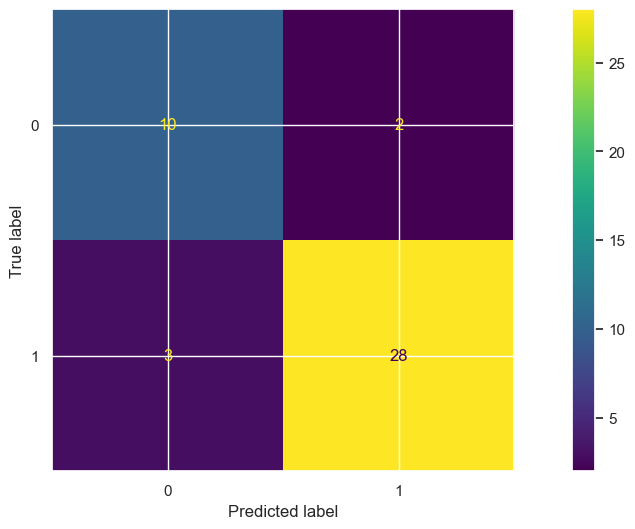

In [75]:
cm=confusion_matrix(y_test,y_predict)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [76]:
import pickle
file=open('best_model.pkl','wb')
pickle.dump(grid_search,file)

In [77]:
## DEcision Tree
tree1 = DecisionTreeClassifier(random_state=42)
params = {
    "class_weight":["balanced"],
    "criterion":["gini", "entropy", "log_loss"],
    "splitter":['best','random'],
    "max_depth":[3,4,5,6,7,10],
    "min_samples_split":[3,4,5,6,7,8],
    "min_samples_leaf":[1,2,3,4,5,6],
    "max_features":["auto","sqrt","log2"]
}

In [78]:
grid_search = GridSearchCV(estimator=tree1,param_grid=params,cv=3)

In [79]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5, 6, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [3, 4, 5, 6, 7, 8],
                         'splitter': ['best', 'random']})

In [80]:
grid_search.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'splitter': 'best'}

In [81]:
grid_search.score(X_train,y_train)

0.9244186046511628

In [82]:
y_predict = grid_search.predict(X_test)

In [83]:
performance_metrices(y_test,y_predict)

CONFUSION_METRIX: [[ 6  6]
 [ 5 26]]
PRECISION_SCORE: 0.8125
RECALL_SCORE: 0.8387096774193549
F1_SCORE: 0.8253968253968254
ACCURACY_SCORE: 0.7441860465116279


(None, None, None, None, None)

In [84]:
## Random Forest
forest1 = RandomForestClassifier(random_state=2)
params = {
    "class_weight":["balanced"],
    "n_estimators":[400],
    "criterion":["gini","entropy"],
    'max_depth': [8,20],
    'min_samples_split': [2, 3,5,8, 10],
    #"max_features":["auto","sqrt","log2"]
}

In [85]:
grid_search = GridSearchCV(estimator=forest1,param_grid=params,cv=5)

In [86]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2),
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy'], 'max_depth': [8, 20],
                         'min_samples_split': [2, 3, 5, 8, 10],
                         'n_estimators': [400]})

In [87]:
grid_search.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 8,
 'min_samples_split': 8,
 'n_estimators': 400}

In [88]:
grid_search.score(X_train,y_train)

0.9825581395348837

In [89]:
y_predict = grid_search.predict(X_test)

In [90]:
performance_metrices(y_test,y_predict)

CONFUSION_METRIX: [[ 7  5]
 [ 3 28]]
PRECISION_SCORE: 0.8484848484848485
RECALL_SCORE: 0.9032258064516129
F1_SCORE: 0.875
ACCURACY_SCORE: 0.813953488372093


(None, None, None, None, None)

In [91]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.70      0.58      0.64        12
           1       0.85      0.90      0.88        31

    accuracy                           0.81        43
   macro avg       0.77      0.74      0.76        43
weighted avg       0.81      0.81      0.81        43



In [92]:
data

,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,67.00,91.00,1,58.00,2,0,55.0,1,58.80,1
1,79.33,78.33,2,77.48,2,1,86.5,0,66.28,1
2,65.00,68.00,0,64.00,0,0,75.0,0,57.80,1
3,56.00,52.00,2,52.00,2,0,66.0,1,59.43,0
4,85.80,73.60,1,73.30,0,0,96.8,0,55.50,1
...,...,...,...,...,...,...,...,...,...,...
210,80.60,82.00,1,77.60,0,0,91.0,0,74.49,1
211,58.00,60.00,2,72.00,2,0,74.0,0,53.62,1
212,67.00,67.00,1,73.00,0,1,59.0,0,69.72,1
213,74.00,66.00,1,58.00,0,0,70.0,1,60.23,1


In [94]:
data.to_csv("Clean Campus Placment.csv",index=False)